In [1]:
#import modules needed
import pandas as pd
import numpy as mp
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from library.sb_utils import save_file

In [2]:
#import cleaned data
ski_data = pd.read_csv('../clean_data/ski_data_cleaned.csv')

In [3]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               277 non-null    object 
 1   Region             277 non-null    object 
 2   state              277 non-null    object 
 3   summit_elev        277 non-null    int64  
 4   vertical_drop      277 non-null    int64  
 5   base_elev          277 non-null    int64  
 6   trams              277 non-null    int64  
 7   fastSixes          277 non-null    int64  
 8   fastQuads          277 non-null    int64  
 9   quad               277 non-null    int64  
 10  triple             277 non-null    int64  
 11  double             277 non-null    int64  
 12  surface            277 non-null    int64  
 13  total_chairs       277 non-null    int64  
 14  Runs               274 non-null    float64
 15  TerrainParks       233 non-null    float64
 16  LongestRun_mi      272 non

In [4]:
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0,2,2,...,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0,0,0,...,1.0,2.0,640.0,60.0,45.0,44.0,350.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0,0,0,...,1.0,1.0,30.0,30.0,150.0,36.0,69.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,1,0,2,...,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0,1,2,...,2.0,1.2,800.0,80.0,115.0,49.0,250.0,78.0,104.0,80.0


In [5]:
#State-wide summary data
state_summary = pd.read_csv('../clean_data/state_summary.csv')

In [6]:
state_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      35 non-null     object 
 1   resorts_per_state          35 non-null     int64  
 2   state_total_skiable_area   35 non-null     float64
 3   state_total_days_open      35 non-null     float64
 4   state_total_terrain_parks  35 non-null     float64
 5   state_total_night_skiing   35 non-null     float64
 6   state_pop                  35 non-null     int64  
 7   state_area_sq_miles        35 non-null     int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 2.3+ KB


In [7]:
state_summary.head()

,state,resorts_per_state,state_total_skiable_area,state_total_days_open,state_total_terrain_parks,state_total_night_skiing,state_pop,state_area_sq_miles
0,Alaska,3,2280.0,345.0,4.0,580.0,731545,665384
1,Arizona,2,1577.0,237.0,6.0,80.0,7278717,113990
2,California,21,25948.0,2738.0,81.0,587.0,39512223,163695
3,Colorado,22,43682.0,3258.0,74.0,428.0,5758736,104094
4,Connecticut,5,358.0,353.0,10.0,256.0,3565278,5543


# Top State by Order of Each Summary Stat

In [8]:
state_summary_newind = state_summary.set_index('state')

In [9]:
#total state area
state_summary_newind.state_area_sq_miles.sort_values(ascending=False).head(10)

state
Alaska        665384
California    163695
Montana       147040
New Mexico    121590
Arizona       113990
Nevada        110572
Colorado      104094
Oregon         98379
Wyoming        97813
Michigan       96714
Name: state_area_sq_miles, dtype: int64

In [10]:
#Montana is 3rd largest state by area

In [11]:
#total state population
state_summary_newind.state_pop.sort_values(ascending=False).head(10)

state
California        39512223
New York          19453561
Pennsylvania      12801989
Illinois          12671821
Ohio              11689100
North Carolina    10488084
Michigan           9986857
New Jersey         8882190
Virginia           8535519
Washington         7614893
Name: state_pop, dtype: int64

In [12]:
#Montana is not in the top ten most populous states, it is less densely populated

In [13]:
#Resorts per state
state_summary_newind.resorts_per_state.sort_values(ascending=False).head(10)

state
New York         33
Michigan         28
Colorado         22
California       21
Pennsylvania     19
New Hampshire    16
Vermont          15
Wisconsin        15
Minnesota        14
Utah             13
Name: resorts_per_state, dtype: int64

In [14]:
#New York has the most followed by Michigan, is this proximity to wealth or just geography?

In [15]:
#total skiable area
state_summary_newind.state_total_skiable_area.sort_values(ascending=False).head(10)

state
Colorado      43682.0
Utah          30508.0
California    25948.0
Montana       21410.0
Idaho         16396.0
Washington    15330.0
Oregon        11774.0
Vermont        7239.0
Wyoming        6523.0
New York       5514.0
Name: state_total_skiable_area, dtype: float64

In [16]:
#Montana comes in 4th for total skiable area, it may have fewer but larger resorts. CO is top for both area and resorts

In [17]:
#total night skiing
state_summary_newind.state_total_night_skiing.sort_values(ascending=False).head(10)

state
New York        2836.0
Washington      1997.0
Michigan        1946.0
Pennsylvania    1528.0
Oregon          1127.0
Wisconsin       1065.0
Minnesota       1020.0
Montana          710.0
Utah             642.0
California       587.0
Name: state_total_night_skiing, dtype: float64

In [18]:
#NY has the highest amount of night skiing area, the top 5 are all northern most states (in fact the top 8 are)
#is this simply trying to extend the day due to shorter days? Is NY domination due to trying to extend the day due to 
#shorter visits for travelers traveling shorter distances

In [19]:
#total days open
state_summary_newind.state_total_days_open.sort_values(ascending=False).head(10)

state
Colorado         3258.0
California       2738.0
Michigan         2389.0
New York         2384.0
New Hampshire    1847.0
Vermont          1777.0
Utah             1544.0
Wisconsin        1519.0
Minnesota        1490.0
Pennsylvania     1404.0
Name: state_total_days_open, dtype: float64

In [20]:
#Resort density
#100k scaling for looking at magnitude of the data
state_summary['resorts_per_100kcapita']= 100_000 * state_summary.resorts_per_state / state_summary.state_pop
state_summary['resorts_per_100ksq_mile']= 100_000 * state_summary.resorts_per_state/ state_summary.state_area_sq_miles
state_summary.drop(columns=['state_pop', 'state_area_sq_miles'], inplace=True)
state_summary.head()

,state,resorts_per_state,state_total_skiable_area,state_total_days_open,state_total_terrain_parks,state_total_night_skiing,resorts_per_100kcapita,resorts_per_100ksq_mile
0,Alaska,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
1,Arizona,2,1577.0,237.0,6.0,80.0,0.027477,1.754540
2,California,21,25948.0,2738.0,81.0,587.0,0.053148,12.828736
3,Colorado,22,43682.0,3258.0,74.0,428.0,0.382028,21.134744
4,Connecticut,5,358.0,353.0,10.0,256.0,0.140242,90.203861


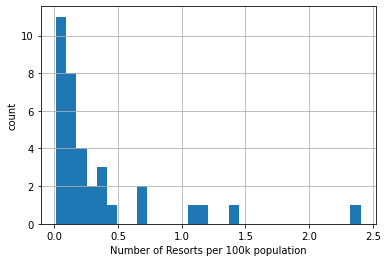

In [21]:
#distribution of new features
state_summary.resorts_per_100kcapita.hist(bins=30)
plt.xlabel('Number of Resorts per 100k population')
plt.ylabel('count');

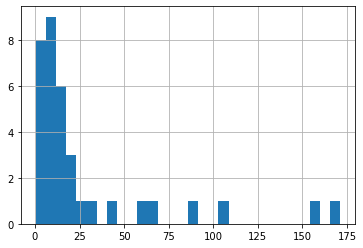

In [22]:
state_summary.resorts_per_100ksq_mile.hist(bins=30)
plt.xlabel=("Number of Resorts per 100k square miles")
plt.ylabel=('count');

In [23]:
#top states by resort density
state_summary.set_index('state').resorts_per_100kcapita.sort_values(ascending=False).head()

state
Vermont          2.403889
Wyoming          1.382268
New Hampshire    1.176721
Montana          1.122778
Idaho            0.671492
Name: resorts_per_100kcapita, dtype: float64

In [24]:
state_summary.set_index('state').resorts_per_100ksq_mile.sort_values(ascending=False).head()

state
New Hampshire    171.141299
Vermont          155.990017
Massachusetts    104.225886
Connecticut       90.203861
Rhode Island      64.724919
Name: resorts_per_100ksq_mile, dtype: float64

In [25]:
#visualizing HD Data
#scale data
state_summary_scale = state_summary.set_index('state')
#save state labels
state_summary_index = state_summary_scale.index
#save column names
state_summary_columns = state_summary_scale.columns

state_summary_scale.head()

,resorts_per_state,state_total_skiable_area,state_total_days_open,state_total_terrain_parks,state_total_night_skiing,resorts_per_100kcapita,resorts_per_100ksq_mile
state,,,,,,,
Alaska,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
Arizona,2,1577.0,237.0,6.0,80.0,0.027477,1.754540
California,21,25948.0,2738.0,81.0,587.0,0.053148,12.828736
Colorado,22,43682.0,3258.0,74.0,428.0,0.382028,21.134744
Connecticut,5,358.0,353.0,10.0,256.0,0.140242,90.203861


In [26]:
state_summary_scale = scale(state_summary_scale)


In [28]:
state_summary_scaled_df = pd.DataFrame(state_summary_scale, columns=state_summary_columns, index=state_summary_index)
state_summary_scaled_df.head()

,resorts_per_state,state_total_skiable_area,state_total_days_open,state_total_terrain_parks,state_total_night_skiing,resorts_per_100kcapita,resorts_per_100ksq_mile
state,,,,,,,
Alaska,-0.806912,-0.392012,-0.689059,-0.816118,0.069410,0.139593,-0.689999
Arizona,-0.933558,-0.462424,-0.819038,-0.726994,-0.701326,-0.644706,-0.658125
California,1.472706,1.978574,2.190933,2.615141,0.080201,-0.592085,-0.387368
Colorado,1.599351,3.754811,2.816757,2.303209,-0.164893,0.082069,-0.184291
Connecticut,-0.553622,-0.584519,-0.679431,-0.548747,-0.430027,-0.413557,1.504408


In [29]:
#verify scaling
state_summary_scaled_df.mean()

resorts_per_state           -6.344132e-17
state_total_skiable_area    -5.432163e-17
state_total_days_open        9.754102e-17
state_total_terrain_parks    4.282289e-17
state_total_night_skiing     6.344132e-17
resorts_per_100kcapita       5.075305e-17
resorts_per_100ksq_mile      5.075305e-17
dtype: float64

In [30]:
state_summary_scaled_df.std()

resorts_per_state            1.014599
state_total_skiable_area     1.014599
state_total_days_open        1.014599
state_total_terrain_parks    1.014599
state_total_night_skiing     1.014599
resorts_per_100kcapita       1.014599
resorts_per_100ksq_mile      1.014599
dtype: float64

In [31]:
state_summary_scaled_df.std(ddof=0)

resorts_per_state            1.0
state_total_skiable_area     1.0
state_total_days_open        1.0
state_total_terrain_parks    1.0
state_total_night_skiing     1.0
resorts_per_100kcapita       1.0
resorts_per_100ksq_mile      1.0
dtype: float64

In [ ]:
#calculate PCA transformation
